In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mateuszbuda/lgg-mri-segmentation")

print("Path to dataset files:", path)

/home/judy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 714M/714M [00:09<00:00, 75.8MB/s] 


Extracting files...
Path to dataset files: /home/judy/.cache/kagglehub/datasets/mateuszbuda/lgg-mri-segmentation/versions/2


In [2]:
!mv /home/judy/.cache/kagglehub/datasets/mateuszbuda/lgg-mri-segmentation/versions/2 datasets/

Results will be saved at `predictions`

In [5]:
# test_id
sample_id = "TCGA_CS_4944_20010208"
# find the image files in the prediction folder
!ls predictions/{sample_id}*

predictions/TCGA_CS_4944_20010208-00.png
predictions/TCGA_CS_4944_20010208-01.png
predictions/TCGA_CS_4944_20010208-02.png
predictions/TCGA_CS_4944_20010208-03.png
predictions/TCGA_CS_4944_20010208-04.png
predictions/TCGA_CS_4944_20010208-05.png
predictions/TCGA_CS_4944_20010208-06.png
predictions/TCGA_CS_4944_20010208-07.png
predictions/TCGA_CS_4944_20010208-08.png
predictions/TCGA_CS_4944_20010208-09.png
predictions/TCGA_CS_4944_20010208-10.png
predictions/TCGA_CS_4944_20010208-11.png
predictions/TCGA_CS_4944_20010208-12.png
predictions/TCGA_CS_4944_20010208-13.png
predictions/TCGA_CS_4944_20010208-14.png
predictions/TCGA_CS_4944_20010208-15.png
predictions/TCGA_CS_4944_20010208-16.png
predictions/TCGA_CS_4944_20010208-17.png


In [ ]:
# display the image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os
import gui

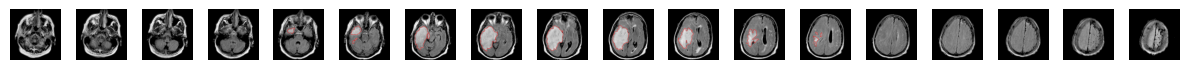

In [11]:
import os
import SimpleITK as sitk
import gui  # Assuming this is your visualization library

# Function to display images
def disp_images(images, fig_size, wl_list=None):
    """
    Display a list of 2D or 3D images using a GUI library.
    :param images: List of images to display.
    :param fig_size: Tuple specifying the figure size.
    :param wl_list: Optional list of window-level settings.
    """
    if images[0].GetDimension() == 2:
        gui.multi_image_display2D(
            image_list=images, figure_size=fig_size, window_level_list=wl_list
        )
    else:
        gui.MultiImageDisplay(
            image_list=images, figure_size=fig_size, window_level_list=wl_list
        )

# Path to the folder containing prediction images
sample_id = "TCGA_CS_4944_20010208"
folder_path = "predictions/"

# Get all image files related to the sample ID
files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if sample_id in f])

# Load all the image files into SimpleITK.Image objects
data = []
for file in files:
    image = sitk.ReadImage(file)  # Read the image using SimpleITK
    data.append(image)

# Display the images with specified figure size
disp_images(data, fig_size=(12, 4))


## Datasets from other domains

In [ ]:
import kagglehub
# THIS IS a CT dataset

# Download latest version
path = kagglehub.dataset_download("mahmoudshaheen1134/brain-tumor-dataset")

print("Path to dataset files:", path)

/home/judy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 7.55M/7.55M [00:00<00:00, 36.9MB/s]

Extracting files...
Path to dataset files: /home/judy/.cache/kagglehub/datasets/mahmoudshaheen1134/brain-tumor-dataset/versions/1


In [2]:
!mv /home/judy/.cache/kagglehub/datasets/mahmoudshaheen1134/brain-tumor-dataset/versions/1 /home/judy/code/brain-segmentation-pytorch/datasets/CT